In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip

--2020-09-15 09:02:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80417803 (77M) [application/x-httpd-php]
Saving to: ‘DevanagariHandwrittenCharacterDataset.zip.1’

DevanagariHandwritt 100%[===================>]  76.69M  19.8MB/s    in 4.8s    

2020-09-15 09:02:30 (15.8 MB/s) - ‘DevanagariHandwrittenCharacterDataset.zip.1’ saved [80417803/80417803]



In [3]:
!unzip "DevanagariHandwrittenCharacterDataset.zip" -d /tmp

Streaming output truncated to the last 5000 lines.
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/104099.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/104101.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/12716.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/12723.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/12724.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/12725.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/12726.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/12727.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/12731.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/12732.png  
 extracting: /tmp/DevanagariHandwrittenCharacterDataset/Train/digit_7/12735.png  
 extracting: /tmp/DevanagariHandwrittenCharac

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

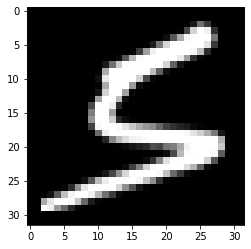

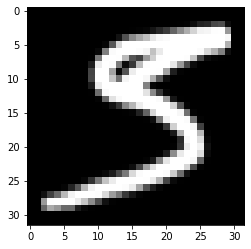

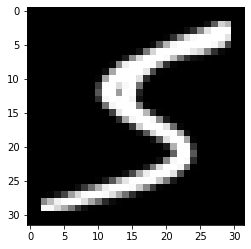

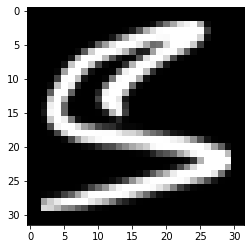

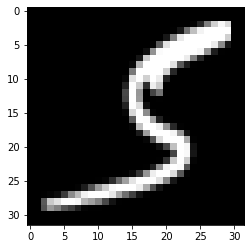

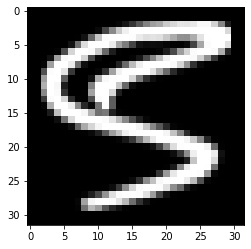

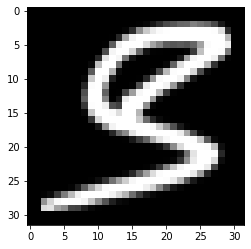

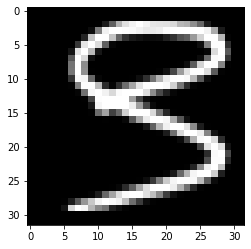

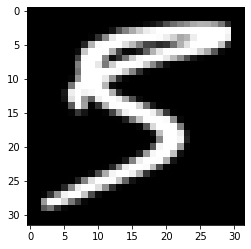

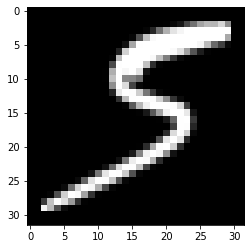

In [5]:
#digit_9
for i in range(7280,7290):
  img=Image.open("/tmp/DevanagariHandwrittenCharacterDataset/Train/digit_9/{0}.png".format(i))
  plt.imshow(img, cmap='gray')
  plt.show()

In [6]:
for i in range(7280,7285):
  dir="/tmp/DevanagariHandwrittenCharacterDataset/Train/digit_9/{0}.png".format(i)
  img=Image.open(dir)
  arr=plt.imread(dir)
  print('\n/digit_9/{0}.png'.format(i),img.size)
  print(arr)


/digit_9/7280.png (32, 32)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

/digit_9/7281.png (32, 32)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.05098039 0.         0.        ]
 ...
 [0.         0.         0.40392157 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

/digit_9/7282.png (32, 32)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.7176471  0.         0.        ]
 ...
 [0.         0.         0.96862745 ... 0.         0.         0.        ]
 [0.         0.    

In [7]:
X_train = []
y_train = []
count = 0
for i in range(10):
    dir="/tmp/DevanagariHandwrittenCharacterDataset/Train/digit_{0}".format(i)
    print(i,":",len(os.listdir(dir)))
    count+=len(os.listdir(dir))
    for j in os.listdir(dir):
        X_train.append(plt.imread(dir+"/"+j))
        y_train.append(i)
print(count)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
print(X_train.shape, y_train.shape)

0 : 1700
1 : 1700
2 : 1700
3 : 1700
4 : 1700
5 : 1700
6 : 1700
7 : 1700
8 : 1700
9 : 1700
17000
(17000, 32, 32) (17000,)


In [8]:
X_test = []
y_test = []
count = 0
for i in range(10):
    dir="/tmp/DevanagariHandwrittenCharacterDataset/Test/digit_{0}".format(i)
    print(i,":",len(os.listdir(dir)))
    count+=len(os.listdir(dir))
    for j in os.listdir(dir):
        X_test.append(plt.imread(dir+"/"+j))
        y_test.append(i)
print(count)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
print(X_test.shape, y_test.shape)

0 : 300
1 : 300
2 : 300
3 : 300
4 : 300
5 : 300
6 : 300
7 : 300
8 : 300
9 : 300
3000
(3000, 32, 32) (3000,)


In [9]:
X_train = X_train.reshape(17000, 1024).astype('float32')
X_test = X_test.reshape(3000, 1024).astype('float32')

In [10]:
#Normalizing the data 
X_train/=255
X_test/=255

In [11]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (17000, 1024)
X_test shape (3000, 1024)


In [12]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([300, 300, 300, 300, 300, 300, 300, 300, 300, 300]))


In [13]:
from keras.utils import to_categorical

In [14]:
#One-hot encoding 
print("Before:", y_train.shape)
print("Before:", y_test.shape)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print("After: ", y_train.shape)
print("After: ", y_test.shape)

Before: (17000,)
Before: (3000,)
After:  (17000, 10)
After:  (3000, 10)


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [16]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))                           
model.add(Dense(256, activation='relu'))   
model.add(Dense(128, activation='relu'))                           
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 699,690
Trainable params: 699,690
Non-trainable params: 0
__________________________________________________

In [18]:
history = model.fit(X_train,y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=128)

Epoch 1/100
133/133 [==============================] - 2s 13ms/step - loss: 1.3431 - accuracy: 0.4921 - val_loss: 0.6018 - val_accuracy: 0.7997
Epoch 2/100
133/133 [==============================] - 2s 12ms/step - loss: 0.5207 - accuracy: 0.8241 - val_loss: 0.4775 - val_accuracy: 0.8310
Epoch 3/100
133/133 [==============================] - 2s 12ms/step - loss: 0.3592 - accuracy: 0.8861 - val_loss: 0.3062 - val_accuracy: 0.9037
Epoch 4/100
133/133 [==============================] - 2s 12ms/step - loss: 0.2593 - accuracy: 0.9174 - val_loss: 0.2381 - val_accuracy: 0.9220
Epoch 5/100
133/133 [==============================] - 2s 12ms/step - loss: 0.2055 - accuracy: 0.9345 - val_loss: 0.1859 - val_accuracy: 0.9457
Epoch 6/100
133/133 [==============================] - 2s 13ms/step - loss: 0.1627 - accuracy: 0.9482 - val_loss: 0.1789 - val_accuracy: 0.9460
Epoch 7/100
133/133 [==============================] - 2s 12ms/step - loss: 0.1234 - accuracy: 0.9619 - val_loss: 0.1324 - val_accuracy:

In [19]:
"""save_dir = "/results/"
model_name = 'devanagari_digits.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)"""

'save_dir = "/results/"\nmodel_name = \'devanagari_digits.h5\'\nmodel_path = os.path.join(save_dir, model_name)\nmodel.save(model_path)\nprint(\'Saved trained model at %s \' % model_path)'

In [20]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc')
    plt.plot(x, val_acc, 'r', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

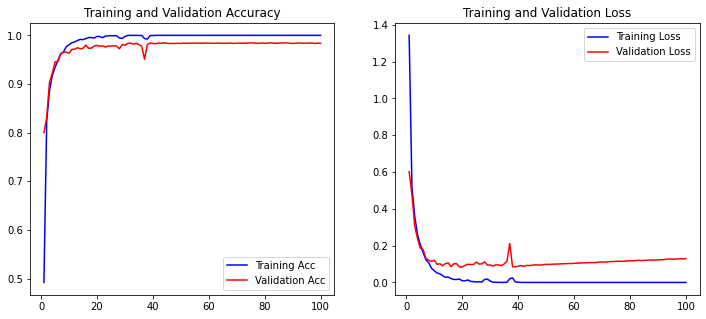

In [21]:
plot_history(history)

In [22]:
metrics = model.evaluate(X_test, y_test, verbose=False)
metrics1 = model.evaluate(X_train, y_train, verbose=False)
print('Train loss:', metrics1[0])
print('Train accuracy:', metrics1[1])
print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1])

Train loss: 9.871213251244626e-07
Train accuracy: 1.0
Test loss: 0.12965352833271027
Test accuracy: 0.9836666584014893


In [23]:
pred = model.predict(X_test[2555:2556])[0]
print(pred)
print(np.where(pred==max(pred)))

[9.0622620e-19 2.4669793e-26 5.0378051e-22 0.0000000e+00 6.1323759e-25
 4.8083730e-37 3.7222664e-27 8.0995357e-26 1.0000000e+00 3.8502591e-23]
(array([8]),)


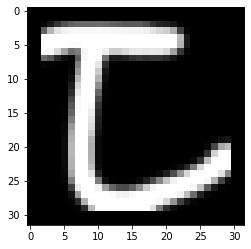

In [24]:
plt.imshow(X_test[2555:2556].reshape(32,32),cmap='gray')
plt.show()

In [25]:
# Neural Network with a single hidden layer
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_shape=(1024,)))                           
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                32800     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 33,130
Trainable params: 33,130
Non-trainable params: 0
_________________________________________________________________


In [26]:
history2 = model2.fit(X_train,y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=128)

Epoch 1/100
133/133 [==============================] - 0s 3ms/step - loss: 2.2475 - accuracy: 0.4867 - val_loss: 2.1608 - val_accuracy: 0.6423
Epoch 2/100
133/133 [==============================] - 0s 2ms/step - loss: 2.0186 - accuracy: 0.6987 - val_loss: 1.8510 - val_accuracy: 0.7427
Epoch 3/100
133/133 [==============================] - 0s 2ms/step - loss: 1.6805 - accuracy: 0.7726 - val_loss: 1.5063 - val_accuracy: 0.7813
Epoch 4/100
133/133 [==============================] - 0s 2ms/step - loss: 1.3641 - accuracy: 0.7977 - val_loss: 1.2221 - val_accuracy: 0.8180
Epoch 5/100
133/133 [==============================] - 0s 2ms/step - loss: 1.1170 - accuracy: 0.8185 - val_loss: 1.0081 - val_accuracy: 0.8303
Epoch 6/100
133/133 [==============================] - 0s 2ms/step - loss: 0.9366 - accuracy: 0.8283 - val_loss: 0.8552 - val_accuracy: 0.8433
Epoch 7/100
133/133 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.8394 - val_loss: 0.7434 - val_accuracy: 0.8480

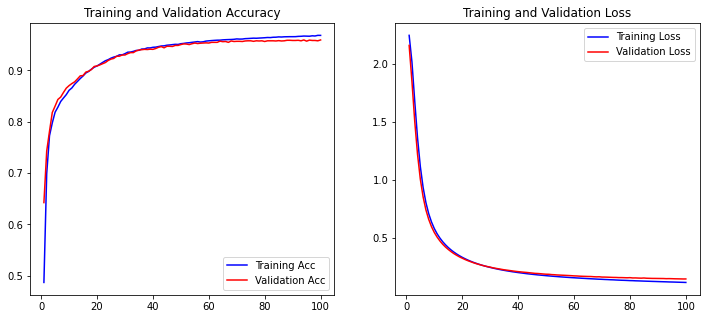

In [28]:
plot_history(history2)

In [29]:
metrics2 = model2.evaluate(X_test, y_test, verbose=False)
metrics2_1 = model2.evaluate(X_train, y_train, verbose=False)
print('Train loss:', metrics2_1[0])
print('Train accuracy:', metrics2_1[1])
print('Test loss:', metrics2[0])
print('Test accuracy:', metrics2[1])

Train loss: 0.11762595921754837
Train accuracy: 0.9685294032096863
Test loss: 0.14865727722644806
Test accuracy: 0.9593333601951599


In [36]:
#Predicting on new data using Model-1
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  X_test=[]
  path = '/content/' + fn
  X_test.append(plt.imread(path)) 
  X_test = np.asarray(X_test)
  X_test = X_test.reshape(1,1024).astype('float32')
  X_test/=255
  classes = model.predict(X_test)
  classes = classes[0]
  a=np.where(classes==max(classes))
  if(a[0]==0):
    print(fn + " is Digit 0")
  elif(a[0]==1):
    print(fn + " is Digit 1")
  elif(a[0]==2):
    print(fn + " is Digit 2")
  elif(a[0]==3):
    print(fn + " is Digit 3")
  elif(a[0]==4):
    print(fn + " is Digit 4")
  elif(a[0]==5):
    print(fn + " is Digit 5")
  elif(a[0]==6):
    print(fn + " is Digit 6")
  elif(a[0]==7):
    print(fn + " is Digit 7")
  elif(a[0]==8):
    print(fn + " is Digit 8")
  else:
    print(fn + " is Digit 9")
  

Saving 1(1).png to 1(1).png
Saving 1(2).png to 1(2).png
Saving 1(3).png to 1(3).png
Saving 1(4).png to 1(4).png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 5.png to 5.png
Saving 7.png to 7.png
Saving 8.png to 8.png
Saving 9(1).png to 9(1).png
Saving 9(2).png to 9(2).png
1(1).png is Digit 1
1(2).png is Digit 1
1(3).png is Digit 1
1(4).png is Digit 1
2.png is Digit 2
3.png is Digit 3
5.png is Digit 5
7.png is Digit 7
8.png is Digit 8
9(1).png is Digit 9
9(2).png is Digit 9
